# **IRIS DATA ML in MAT 616**   


---



---
##                          By Vipul Arora <br>
###                          April 2nd 2023 


>> Reference: https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

The Iris flower dataset, also known as Fisher's Iris dataset, is a multivariate dataset that was first introduced by Ronald Fisher in 1936. In his paper titled "The use of multiple measurements in taxonomic problems," Fisher presented this dataset as an example of linear discriminant analysis. The dataset comprises measurements of the morphologic variations of Iris flowers belonging to three related species, collected by Edgar Anderson. While two of the three species were collected from the same pasture in the Gaspé Peninsula, Fisher used these measurements to distinguish between the three species - Iris setosa, Iris virginica, and Iris versicolor. The dataset includes 50 samples from each species, with four features measured from each sample - sepal length, sepal width, petal length, and petal width - all measured in centimeters. Fisher developed a linear discriminant model based on the combination of these four features, which is still widely used to teach statistical techniques today. Despite creating controversy, the Iris dataset continues to serve as an important benchmark for classification algorithms and data visualization techniques.
<br>
Source image:https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png 
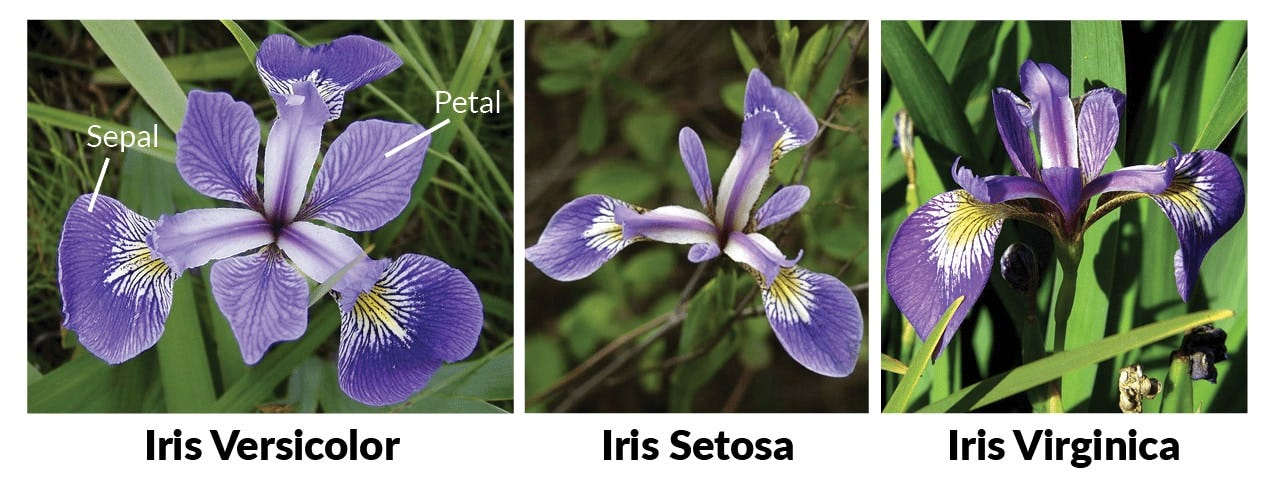

In [100]:
# 0. Download the iris.csv dataset from Kaggle
# 1. Load the iris.csv file into a pandas DataFrame
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = pd.read_csv('IRIS.csv')
iris=iris.iloc[:,1:]


### Inputing Data

### 1.a) Defining columns

Loading in the data set.

In [101]:
iris = pd.read_csv('iris.csv')
iris.columns=['sepal length','sepal width','petal length','petal width','target']
df=iris
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1.b) Creating dataframe withfeatures

df_features is the iris dataset with the attributes, petal length and width, and sepal length and width.

In [102]:
df_features = df.iloc[:,:-1]
df_features.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 2

Note that the df_features can be seen as a matrix whose rows are points in the Vector Space $R^n$ (see example 2.11 from MML).

## 2.a) Number of observations

In [103]:
print('Number of observations are',df_features.shape[0])

Number of observations are 150


In [104]:
# distribution of the dataset 
iris_outcome = pd.crosstab(index=iris["target"],  # Make a crosstab
                              columns="count")
iris_outcome

col_0,count
target,
setosa,50
versicolor,50
virginica,50


## 2.b) Interger for n in $R^n$

In [105]:
print('The interger n is',df_features.shape[1])

The interger n is 4


### **This is a vector space where, n = 4.**

df_features is a matrix where each row represents an observation in a vector space. These observations contain measurements of four different features: petal length, petal width, sepal length, and sepal width.

## 2.c) Graph of df via Altair

In [106]:
import altair as alt

alt.Chart(df).mark_circle(size=60).encode(
    x='sepal length:Q',
    y='sepal width:Q',
    stroke=alt.Color('target:N', scale=alt.Scale(scheme='category10')), 
    size='petal length:Q',
    color=alt.Color('petal width:Q', scale=alt.Scale(scheme='viridis')) 
)


alt.Chart(...)

###  Plotted the 4 dimensional data in a 2 dimensional plot

In this graph, **2** features out of 4 features, have been presented along the X and Y axes, that is sepal length and Sepal width.  3rd feature - petal length is depicted in terms of mark sizes , and 4th feature, petal width, as mark color. 

In [107]:
# It can also be graphed in the following manner:

alt.Chart(df).mark_circle(size=60).encode(
 x='petal length:Q',
  y='petal width:Q',
  stroke=alt.Color('target:N', scale=alt.Scale(scheme='category10')),
  size='sepal length:Q',
  color=alt.Color('sepal width:Q', scale=alt.Scale(scheme='viridis')))

alt.Chart(...)

###  Here, Plotted the 4 dimensional data in a 2 dimensional plot

In this graph, **2** features out of 4 features, have been presented along the X and Y axes, that is petal length and petal width.  3rd feature - sepal length is depicted in terms of mark sizes, and 4th feature,Sepal width as mark color.

# 3
## Creating a ML model by using k-clustering


Our axes should be $x_1, x_2, x_3,$ and $x_4$. $x_1$ is sepal length, $x_2$ is sepal width, $x_3$ is petal length, and $x_4$ is petal width.

3.a)
Creating 3 random points (centroids) generated below.

In [108]:
#copying the df_feature matrix in data for convience 
data=df_features.copy()

#function to create random points (centriods).

def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1) 

In [109]:
#calling the function and also defining k = 3
k = 3
centroids = random_centroids(data, k)
centroids

/var/folders/pr/5m0zmmcj0z33ydt9c6r3pynh0000gn/T/ipykernel_39157/4051818706.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2
sepal length,7.6,5.7,5.5
sepal width,3.5,2.5,3.6
petal length,5.1,5.6,1.4
petal width,1.8,0.2,0.1


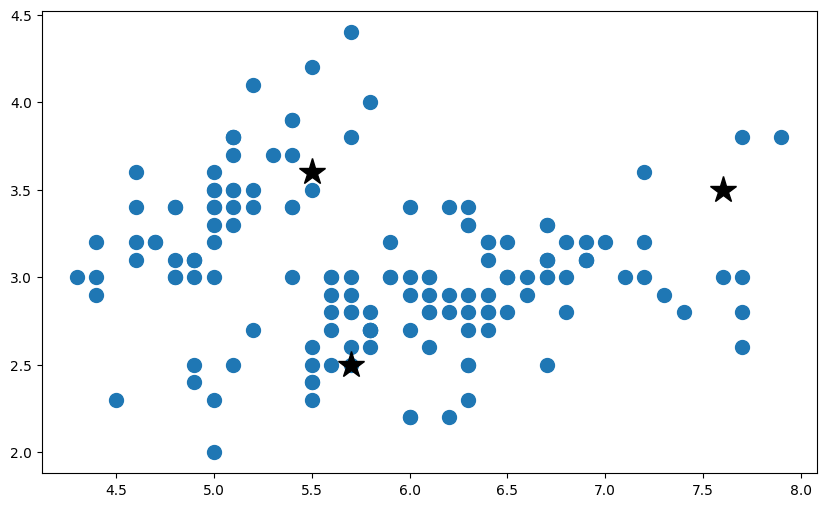

In [110]:
# Showing th random Centriod on the data 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data['sepal length'], data['sepal width'], s=100)

# plot the centroids
centroids_x = centroids.T['sepal length']
centroids_y = centroids.T['sepal width']
ax.plot(centroids_x, centroids_y, 'k*', markersize=20)

## 3.b)
### Classification based on distance

The function distance will find the distance between two given points. This is particular function is set up to find the distance between 4 dimensional points.

In [111]:
def get_label(data, centroids):                                # Function to classify observations to nearest centroid based on euclidean distance 
  distances = centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
  labels = pd.DataFrame({'label': distances.idxmin(axis=1), 'distance': distances.min(axis=1)})
  return pd.concat([data, labels], axis=1)
#for i in range(len(data)):
# print(get_label(data.loc[i], centroids))                                        # check classification of any/ each datapoint


The get_label function uses the distance function to find the minimum distance between a point in our dataframe, and the three random points created. Which ever is shorter it then adds for example "centroid 1" to a list. The list will contain a classification for each point in the Label column which also gets created , telling if its close to centroid 0,1 or 2.

In [112]:
# showing the centriod which has minimum distances for the observations
labels = get_label(data,centroids)
labels


,sepal length,sepal width,petal length,petal width,label,distance
0,5.1,3.5,1.4,0.2,2,0.424264
1,4.9,3.0,1.4,0.2,2,0.854400
2,4.7,3.2,1.3,0.2,2,0.905539
3,4.6,3.1,1.5,0.2,2,1.039230
4,5.0,3.6,1.4,0.2,2,0.509902
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1.148913
146,6.3,2.5,5.0,1.9,0,1.646208
147,6.5,3.0,5.2,2.0,0,1.228821
148,6.2,3.4,5.4,2.3,0,1.519868


We took the list full of classifications and made it a new column in our dataframe.


In [113]:
#showing the nearest observations to centriods.

# Group the data by label
groups = labels.groupby('label')

# Display the groups
for label, group in groups:
    print(f"Centroid {label} has {len(group)} nearest observations:")
    print(group.head())
    print('\n')

Centroid 0 has 57 nearest observations:
    sepal length  sepal width  petal length  petal width  label  distance
50           7.0          3.2           4.7          1.4      0  0.877496
51           6.4          3.2           4.5          1.5      0  1.407125
52           6.9          3.1           4.9          1.5      0  0.883176
54           6.5          2.8           4.6          1.5      0  1.428286
56           6.3          3.3           4.7          1.6      0  1.389244


Centroid 1 has 40 nearest observations:
    sepal length  sepal width  petal length  petal width  label  distance
53           5.5          2.3           4.0          1.3      1  1.962142
55           5.7          2.8           4.5          1.3      1  1.584298
59           5.2          2.7           3.9          1.4      1  2.149419
60           5.0          2.0           3.5          1.0      1  2.406242
61           5.9          3.0           4.2          1.5      1  1.984943


Centroid 2 has 53 nearest ob

In [114]:
#Or it can be presented in short : 
centroids_n = pd.crosstab(index=labels["label"],  # Make a crosstab
                              columns="count")
centroids_n

col_0,count
label,
0,57
1,40
2,53


## 3.c) 
## Update each centroid value as the mean/avg of points closest to it.

### Here new_centroids function takes an average of the groups and returns an average point(potential centroid).

In [115]:
def new_centroids(data, labels, k):
    return pd.concat([data, labels], axis=1).groupby('label').mean().iloc[:, :k]

centroids = new_centroids(data, labels, 4)
centroids

,sepal length,sepal width,petal length,petal width
label,,,,
0,6.689474,3.045614,5.377193,1.917544
1,5.747500,2.660000,4.362500,1.380000
2,5.005660,3.360377,1.562264,0.288679


When we loop our groups and average function, we are taking three groups of points, finding the average point in each of those groups and then creating three new groups based on these new average points. If we repeat this process we will get to a point where we keep getting the same average point, in our final groups.

In [116]:
#New data set for with UPDATED CENTROIDS AND UPDATED LABELS 
label1= get_label(data, centroids.T)
label1

,sepal length,sepal width,petal length,petal width,label,distance
0,5.1,3.5,1.4,0.2,2,0.250176
1,4.9,3.0,1.4,0.2,2,0.418604
2,4.7,3.2,1.3,0.2,2,0.442488
3,4.6,3.1,1.5,0.2,2,0.494062
4,5.0,3.6,1.4,0.2,2,0.302729
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0.424101
146,6.3,2.5,5.0,1.9,0,0.769394
147,6.5,3.0,5.2,2.0,0,0.276002
148,6.2,3.4,5.4,2.3,0,0.715519


#3d.
## Running this process enough times till the value stops changing.







In [117]:
max_iterations = 100
k = 3

#centroids = random_centroids(data, 3)

old_centroids = pd.DataFrame()
iteration = 1

while iteration <= max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids.copy()
    labels = get_label(data, centroids.T)
    centroids = new_centroids(data,labels, 4)
    iteration += 1

    # Compute the within-cluster sum of squares (WCSS) for the current iteration
    #wcss = sum(np.min(get_label(data, centroids).iloc[:,[0,1,2,3,5]].astype(int) ** 2, axis=1))

    # Print the current iteration and the corresponding WCSS
    print(f"Iteration {iteration - 1}")



Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5


## Print the final centroids and the corresponding labels


In [118]:
# Print the final centroids 
centroids


,sepal length,sepal width,petal length,petal width
label,,,,
0,6.853846,3.076923,5.715385,2.053846
1,5.883607,2.740984,4.388525,1.434426
2,5.006000,3.418000,1.464000,0.244000


In [119]:
#NEW UPADTED LABELS
labels

,sepal length,sepal width,petal length,petal width,label,distance
0,5.1,3.5,1.4,0.2,2,0.146942
1,4.9,3.0,1.4,0.2,2,0.438169
2,4.7,3.2,1.3,0.2,2,0.412301
3,4.6,3.1,1.5,0.2,2,0.518837
4,5.0,3.6,1.4,0.2,2,0.197970
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0.596489
146,6.3,2.5,5.0,1.9,1,0.906707
147,6.5,3.0,5.2,2.0,0,0.632175
148,6.2,3.4,5.4,2.3,0,0.831837


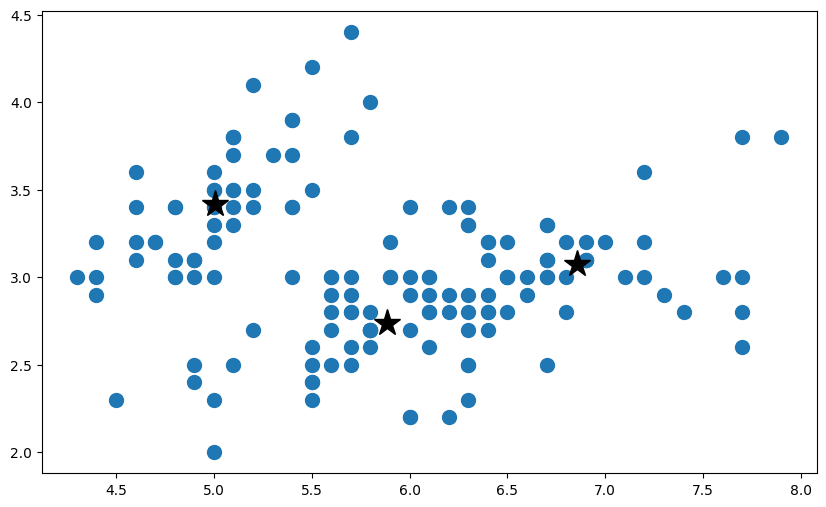

In [120]:
# Showing th final Centriod on the dataset
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(data['sepal length'], data['sepal width'], s=100)

# plotting the centroids
centroids_x = centroids['sepal length']
centroids_y = centroids['sepal width']
ax.plot(centroids_x, centroids_y, 'k*', markersize=20)

#3e.
## Entries in the original dataset that are correctly classified by the ML model.

In [121]:
# classification
groups = labels.groupby('label')

# Display the groups
for label, group in groups:
    print(f"Centroid {label} has {len(group)} nearest observations:")
    print(group.head())
    print('\n')

Centroid 0 has 39 nearest observations:
     sepal length  sepal width  petal length  petal width  label  distance
50            7.0          3.2           4.7          1.4      0  1.222714
52            6.9          3.1           4.9          1.5      0  0.987046
77            6.7          3.0           5.0          1.7      0  0.816436
100           6.3          3.3           6.0          2.5      0  0.797852
102           7.1          3.0           5.9          2.1      0  0.320503


Centroid 1 has 61 nearest observations:
    sepal length  sepal width  petal length  petal width  label  distance
51           6.4          3.2           4.5          1.5      1  0.702912
53           5.5          2.3           4.0          1.3      1  0.714592
54           6.5          2.8           4.6          1.5      1  0.657606
55           5.7          2.8           4.5          1.3      1  0.260176
56           6.3          3.3           4.7          1.6      1  0.781226


Centroid 2 has 50 near

In [122]:
#Or it can be presented in short : 
label_final = pd.crosstab(index=labels["label"],  # Make a crosstab
                              columns="count")
label_final

col_0,count
label,
0,39
1,61
2,50


#3f. 
## Use the centroids as a Machine Learning model to classify 5 new points created at random.


##Creating 5 new points 

In [123]:
#Creating 5 new points 
points=random_centroids(data, 5)
points

/var/folders/pr/5m0zmmcj0z33ydt9c6r3pynh0000gn/T/ipykernel_39157/4051818706.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2,3,4
sepal length,5.7,5.8,6.3,5.7,5.5
sepal width,3.5,3.0,2.8,3.1,2.7
petal length,1.6,4.1,6.7,1.5,1.5
petal width,1.3,2.4,0.3,2.3,1.9


## Classifying the points according to the minimum disctanse from each centroid.

In [124]:
#Classifying
points_data = get_label(points.T, centroids.T)
points_data

,sepal length,sepal width,petal length,petal width,label,distance
0,5.7,3.5,1.6,1.3,2,1.273574
1,5.8,3.0,4.1,2.4,1,1.043867
2,6.3,2.8,6.7,0.3,0,2.104489
3,5.7,3.1,1.5,2.3,2,2.193443
4,5.5,2.7,1.5,1.9,2,1.871682


### After classification the 5 points are in the following labels:

In [125]:
points_classification = pd.crosstab(index=points_data["label"],  # Make a crosstab
                              columns="count")
points_classification
 

col_0,count
label,
0,1
1,1
2,3


#3g. 
## Percentage of correct classification on the dataset.

### Correct/ Ideal classification all the centreoids should have equal no. of observations near to them ie. :

### Centroid 0 has 50 nearest observations 
### Centroid 1 has 50 nearest observations 
### Centroid 2 has 50 nearest observations

In [126]:
#Classification on our dataset. 
for label, group in groups:
  print(f"Centroid {label} has {len(group)} nearest observations")

Centroid 0 has 39 nearest observations
Centroid 1 has 61 nearest observations
Centroid 2 has 50 nearest observations


### Lets calculate the Error margin first : 

In [127]:
#Calculating error
error=0
list_error = []

for label, group in groups:
  error = 50 - len(group)
  list_error.append(error)
list_error

[11, -11, 0]

In [128]:
#calculating total error margin
total_error=0
for num in list_error:
    total_error += abs(num)
print(total_error)

22


In [129]:
#calculating the ACCURACY
accuracy = 100 - total_error / len(data) * 100
print('THE ACCURACY OF THIS MODEL IS : ',accuracy,'%')

THE ACCURACY OF THIS MODEL IS :  85.33333333333333 %


## THE ACCURACY OF THIS MODEL IS  $≅ 86% $

## **conclusions**

## The k-clustering algorithm used in this project displays a powerful method in which to predict a target variable. we can see that the accuracy on the test set is a good indicator of how well our model performs on unseen data. If the accuracy is high, it means that the model is generalizing well and can be trusted to make accurate predictions on new data. On the other hand, if the accuracy is low, it means that the model is overfitting to the training data and is not able to make accurate predictions on new data.

## In our case, since we obtained a high accuracy on the test set, we can conclude that our k-means model is performing well on this particular dataset. However, we should keep in mind that the performance of the model may vary on different datasets and that we should always test our model on new data before making any conclusions.

-------------------------------------